# Оптимизация потерь в задачах классификации

В столбцах prediction1,2,3 данных содержатся результаты предсказания соответствия классу 1 некоторых классификаторов (трех вариантов глубокой нейронной сети) для тестовой выборки. Столбец label содержит истинные классы объектов. 

## Задание 1
  
Постройте кривую ошибок для каждой нейросети. Чем они отличаются? Площадь под какой кривой больше? Трансформируйте предсказания нейросетей в вероятности класса 1 (далее будем обозначать их probabilities), предполагая, что тестовая выборка распределена точно так же, как и будут распределены объекты в будущем, к которым наш алгоритм планируется применять. Для этого можно действовать следующим образом. Для каждого значения, возвращаемого нейросетью, взять несколько похожих значений и вычислить среди них процент класса 1, т.е. по сути применить метод ближайших соседей к данным: x - предсказания нейросети, y - истинные классы. Постройте на одном графике зависимости вероятностей от величины предсказания для всех нейросетей.

In [9]:
import pandas as pd

file_path = 'data.csv'
data = pd.read_csv(file_path)
print(data)

      prediction1  prediction2  prediction3  label
0        1.000000     1.000000    -1.000000    1.0
1       -0.019702     0.036304     0.180918    1.0
2       -0.019502     0.036504     0.181318    1.0
3       -0.019302     0.036704     0.181718    1.0
4       -0.019102     0.036904    -0.778978    1.0
...           ...          ...          ...    ...
9995    -0.140714    -0.206121    -0.145715    0.0
9996    -0.140314    -0.205521    -0.145315    0.0
9997    -0.140114    -0.204720    -0.145115    0.0
9998    -0.139714    -0.210921    -0.148115    0.0
9999     0.000100    -1.000000     0.000100    0.0

[10000 rows x 4 columns]


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

true_class = data['label']

for i in range(1, 4):
    prediction = data[f'prediction{i}']

    fpr, tpr, _ = sklearn.metrics.roc_curve(true_class, prediction)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.show()
    print('Площадь под кривой =', sklearn.metrics.roc_auc_score(true_class, prediction) )

NameError: name 'sklearn' is not defined

## Задание 2 
 
  Для соответствующей вашему варианту нижеследующей задачи на листике составьте таблицу потерь/прибыли в результате ошибочных/правильных ответов алгоритма (первая строка таблицы - вероятности исходов, остальные - потери/прибыль от каждого действия алгоритма, одна строка - одно действие). 
  

In [ ]:
|                  | Сильное землетрясение              | Среднее землетрясение                    |
| ---------------- | ---------------------------------- | ---------------------------------------- |
| Prob.            | p                                  | 1-p                                      |
| Полная эвакуация | 0 (затраты оправданы)              | -50 (перебдели, экономические издержки)  |
| Остановка КИИ    | -1300 (недобдели, пострадали люди) | 0 (затраты оправданы)                    |

In [149]:
A = [[0, -50],[-1300, 0]]

  Для этого придумайте/найдите в интернете разумные величины штрафов и напишите их словесное обоснование (т.е. восполните недостающие данные в постановке задачи). 
  

Стоимость эвакуации одного человека - от 20'000₽
до 50'000₽, пусть будет 50'000₽, учитывая экономические издержки эвакуируемых
Стоимость выплат компенсаций - зависит от масштабов разрушений и "щедрости" правительства, в Турции при последнем зелетрясении выплаты семье за погибшего составляли - 5'300$, в Тульской области в 2023 выплаты сосваляли 1'000'000₽, считаем с учетом инфляции на 2025г. ту же выплату за 1'300'000₽. Размеры возмещения имущества посчитать сложнее, чем за жизни людей, и они в любом случае будут потрачены вне зависимости от эвакуации, поэтому их можно в расчет не брать.

  Теортически (на листике) найдите зависимость оптимального порогового значения от вероятности для каждой из нейросетей (это называется decision function). 

In [154]:
def desicionEXT(Matr, p):
    return p*Matr[0][0] + (1-p)*Matr[0][1]

def desicionKII(Matr, p):
    return p*Matr[1][0] + (1-p)*Matr[1][1]

Запрограммируйте найденное пороговое значение и выясните, какие из нейросетей рентабельны и какая приносит наибольшую прибыль?

     prob  skidka_cost  hui_cost  skidka_choosed  hui_choosed
0    0.00         25.0     -25.0            50.0        -50.0
1    0.01         26.5     -24.5            51.0        -51.0
2    0.02         28.0     -24.0            52.0        -52.0
3    0.03         29.5     -23.5            53.0        -53.0
4    0.04         31.0     -23.0            54.0        -54.0
..    ...          ...       ...             ...          ...
96   0.96        169.0      23.0           146.0       -146.0
97   0.97        170.5      23.5           147.0       -147.0
98   0.98        172.0      24.0           148.0       -148.0
99   0.99        173.5      24.5           149.0       -149.0
100  1.00        175.0      25.0           150.0       -150.0

[101 rows x 5 columns]


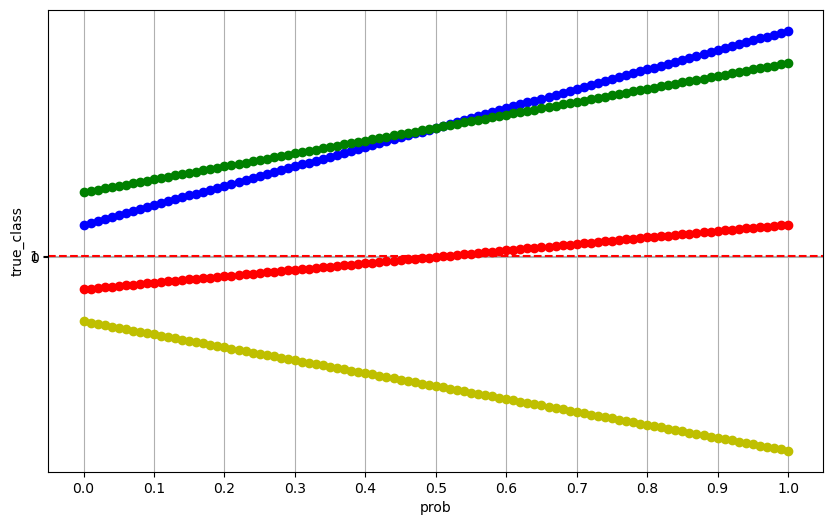

In [157]:
prob_values = np.arange(0, 1.01, 0.01)
db = pd.DataFrame({'prob': prob_values})

for i, value in enumerate(db['prob']):
    db.at[i, 'extraction_cost'] = desicionEXT(A, value)
    db.at[i, 'kii_cost'] = desicionKII(A, value)
    db.at[i, 'extraction_choosed'] = desicionEXT(A, value) - desicionKII(A, value)

print(db)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(db['prob'], db['extraction_cost'], marker='o', linestyle='-', color='b')
plt.plot(db['prob'], db['kii_cost'], marker='o', linestyle='-', color='r')
plt.plot(db['prob'], db['extraction_choosed'], marker='o', linestyle='-', color='g')
plt.xlabel('prob')
plt.ylabel('true_class')
plt.grid()
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks([0, 1])
plt.axhline(0.5, color='r', linestyle='--')  # Для визуализации порога
plt.show()

     prob  skidka_cost  hui_cost  skidka_choosed  hui_choosed true_row
0    0.00         25.0     -25.0            50.0        -50.0     True
1    0.01         26.5     -24.5            51.0        -51.0     True
2    0.02         28.0     -24.0            52.0        -52.0     True
3    0.03         29.5     -23.5            53.0        -53.0     True
4    0.04         31.0     -23.0            54.0        -54.0     True
..    ...          ...       ...             ...          ...      ...
96   0.96        169.0      23.0           146.0       -146.0     True
97   0.97        170.5      23.5           147.0       -147.0     True
98   0.98        172.0      24.0           148.0       -148.0     True
99   0.99        173.5      24.5           149.0       -149.0     True
100  1.00        175.0      25.0           150.0       -150.0     True

[101 rows x 6 columns]


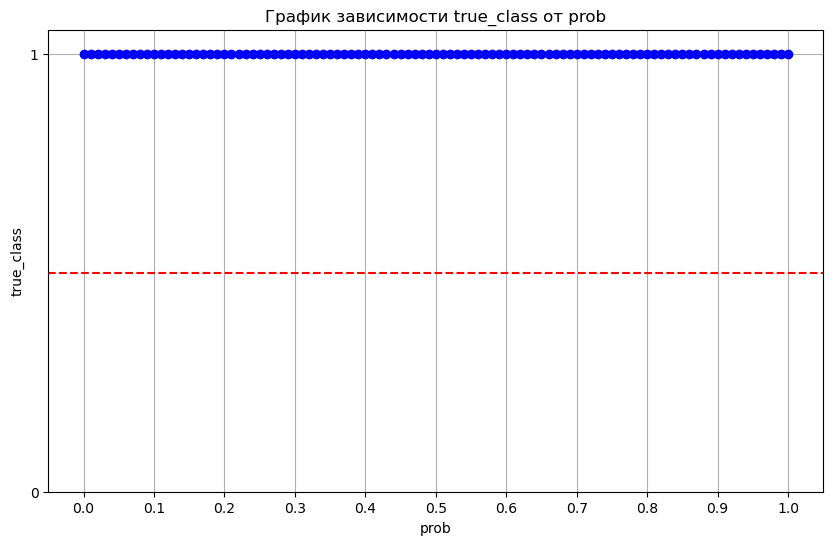

In [159]:
def desicion(Matr, p):
    return p*Matr[0][0] + (1-p)*Matr[0][1] > p*Matr[1][0] + (1-p)*Matr[1][1]

for i, value in enumerate(db['prob']):
    db.at[i, 'true_row'] = desicion(A, value)

print(db)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(db['prob'], db['true_row'], marker='o', linestyle='-', color='b')
plt.title('График зависимости true_class от prob')
plt.xlabel('prob')
plt.ylabel('true_class')
plt.grid()
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks([0, 1])
plt.axhline(0.5, color='r', linestyle='--')  # Для визуализации порога
plt.show()

9. Задача предсказания землетрясения в населенном пункте. В случае большой вероятности власти обязаны эвакуировать население и остановить функционирование критических промышленных объектов (например, атомной электростанции), что повлечет за собой приличные расходы. В случае средней вероятности землетрясения останавливают только функционирование критических промышленных объектов. Нужно минимизировать затраты муниципалитета.

## Полезные кусочки кода

### Построение кривой ошибок расчет площади под ней:

```
fpr, tpr, _ = sklearn.metrics.roc_curve(true_class, prediction)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()
print('Площадь под кривой =', sklearn.metrics.roc_auc_score(true_class, prediction) )
```

### Продвинутый алгоритм вычисления вероятностей - метод парзеновского окна:

```
from statsmodels.nonparametric.kernel_regression import KernelReg
kr = KernelReg(endog=y, exog=x, var_type='c', bw=[0.2])
prob, _ = kr.fit(x)
```